### Descripción del problema

Se desea detectar los tipos de clientes existentes en una empresa con el fin de poder definir políticas para su manejo en su etapa posterior.

In [1]:
%%writefile data.csv
x1,x2
10.67,14.7
10.87,6.91
13.27,13.92
9.74,13.79
11.95,6.05
14.4,16.58
10.23,14.3
12.77,7.97
14.5,17.39
11.17,15.53
13.25,8.03
14.2,16.7
10.41,15.08
14.42,9.25
14.62,17.22
11.14,14.45
16.03,9.88
13.05,12.2
10.12,12.95
12.23,6.97
14.43,16.31
9.58,13.76
13.24,8.58
13.51,15.12
11.16,15.21
10.88,6.15
14.63,17.0
10.08,13.53
15.85,9.51
15.36,16.95
9.96,13.31
11.63,7.28
14.24,17.55
9.17,12.41
13.41,8.35
13.82,15.46
11.52,16.01
11.71,6.37
14.52,18.9
11.27,15.41
12.49,7.6
15.43,19.0
8.72,11.66
14.46,8.21
14.58,17.01
11.3,15.11
15.0,10.11
12.87,14.26
9.7,13.56
12.24,7.16
15.37,18.91
8.69,11.81
13.68,8.12
15.61,19.0
10.99,16.28
15.06,8.47
15.12,17.84
10.82,14.41
12.78,8.74
13.64,15.49

Overwriting data.csv


### Agrupamiento usando KMeans en Python


In [20]:
# Preparación

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
df = pd.read_csv(
    "data.csv",
    sep = ",",
    thousands = None,
    decimal = ".")

In [22]:
from sklearn.cluster import KMeans

#Crea el clasificador

m = KMeans(n_clusters = 3)

# Construye los clusters

m.fit(df.values)

#Pronostica los clusters para la muestra de datos

p = m.predict(df.values)
p

array([2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0])

In [23]:
# Número de elementos por cluster

(pd.DataFrame(p))[0].value_counts()

2    23
1    20
0    17
Name: 0, dtype: int64

In [24]:
# Centros de los clusters

m.cluster_centers_

array([[14.58705882, 17.20176471],
       [13.1975    ,  7.9855    ],
       [10.67956522, 14.07173913]])

In [25]:
#Promedio de x1 y x2 por cluster

df["cluster"] = p
df.groupby("cluster").mean()

,x1,x2
cluster,,
0,14.587059,17.201765
1,13.197500,7.985500
2,10.679565,14.071739


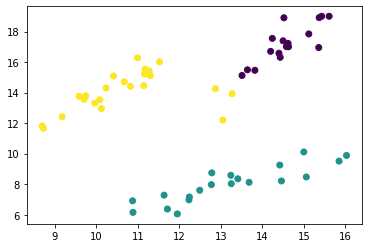

In [26]:
## Gráfico de los clusters

plt.scatter(df.values[:, 0], df.values[:, 1], c = p)

### Escalamiento y transformación de variables

El algoritmo K-means se ve afectado por la escala de las variables. Por ello, se debe realizar la transformación de las variables antes de aplicar K-means. En las siguientes ecuaciones, x representa cualquiera de las componentes de x

**Normalización max-min** x = x-min(x)/(max(x)-min(x)
**Estandarización z-score** z = x-mediax/desviaciónestandarx

### Otras técnicas de agrupamiento

### Clustering Jerárquico Divisivo

El algoritmo se inicia con un solo cluster que contiene todos los datos. Cada cluster es dividido recursivamente en dos clusters de máxima disimilitud. El algoritmo finaliza cuando hay un cluster por cada observación.

### Clustering Jerárquico Aglomerativo

En esta algoritmo, cada cluster contiene un solo dato.

- Se calcula la métrica de distancia entre todos los clusters.

- Se unen los dos clusters con menor distancia en uno solo.

- Se retorna al paso 1.

El algoritmo se detiene cuando se llegue a un solo cluster que contiene todos los datos.

### Bisecting K-means


Este es un procedimiento constructivo a medias entre el agrupamiento jerárquico y K-means. El algoritmo se inicia con un solo cluster que contiene todos los datos y se ejecuta de la siguiente forma:

- Se selecciona un cluster para dividir.

- Se divide el cluster seleccionado en dos clusters usando K-means. Este es el paso de bisección.

- Repita el paso 2 por un número fijo de veces y seleccione la partición con la mejor métrica de desempeño.

- Repita los pasos 1, 2 y 3 hasta alcanzar el número deseado de clusters.

**Actividad.**— Para el conjunto de datos que aparece al final de este tutorial, aplique este método hasta obtener 3 clusters.

### K-medoids

En esta variación del algoritmo, los centros (medoids) de cada cluster son puntos de la muestra de datos; esto es, el centro de cada cluster es uno de los puntos asignados al cluster. El algoritmo opera de forma similar a K-means:

- Paso 1: Se seleccionan k puntos como centros de los clusters.

- Paso 2: Para todos los clusters se verifica si alguno de los miembros del cluster disminuye la métrica de distancia utilizada. En caso afirmativo, este punto pasa a ser el nuevo centro del cluster. En caso negativo, hay convergencia del algoritmo.

- Paso 3: Se asignan los puntos al cluster con centro más cercano y se retorna al Paso 2.

Actividad.— Para el conjunto de datos que aparece al final de este tutorial, use los puntos 1, 21 y 41 como medoids. Asigne los puntos restantes a cada uno de los clusters y determine cuál punto debe ser el siguiente medoid para cada cluster.

### K-means ++

Este algoritmo es similar al algoritmo K-means, con la diferencia que los nuevos centros de los clusters son generados de forma aleatoria.

### Mini batch K-means

Este método se basa en tomar un subconjunto de los datos disponibles para estimar los clusters. Se usa para grandes conjuntos de datos.

Para un número T de iteraciones y unos centros iniciales aleatorios se realiza el siguiente procedimiento:

- Se seleccionan b puntos aleatoriamente del conjunto de datos.

- Se asignan los puntos a los clusters actuales como en K-means.

- Por cada uno de los b puntos se ajusta el centro del correspondiente cluster uno a uno.

Este algoritmo usa una regla de ajuste similar a la regla de aprendizaje del perceptrón.

### Canopy Clustering

Es un método para crear grupos de elementos cercanos y se puede usar como una fase preliminar antes de usar otros métodos como k-means. El método requiere definir dos distancias T1 y T2. El método funciona como se indica a continuación:

- Se colocan todos los puntos en el conjunto S.

- Mientras S no este vacio:

* Seleccione aleatoriamente un punto r del conjunto S y remuevalo. Este el centro de un nuevo canopy.

* Para cada punto x en S compute la distancia d entre x y r.

* Si d < T1, agregue el punto x al canopy con centro en r.

* Si d < T2, remueva x de S.

Note que un punto podría pertenecer a más de un canopy. Para el ejemplo desarrollado, cada canopy es representado por un circulo.